In [1]:
import numpy as np
import pandas as pd
import csv
import torch
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
T = 100
x = np.arange(0,T)
y1= np.sin(4*np.pi*x/T)
y2= np.cos(4*np.pi*x/T)
#y3= (np.cos(4*np.pi*x/T)+np.sin(4*np.pi*x/T))/np.sqrt(2)
#base_time_series = np.array([y1,y2,y3])
base_time_series = np.array([y1,y2])

<AxesSubplot:>

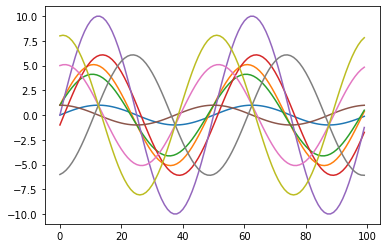

In [60]:
# sns.lineplot(x=np.arange(0,T),y=new_series[0])
# sns.lineplot(x=np.arange(0,T),y=new_series[1])
# sns.lineplot(x=np.arange(0,T),y=new_series[2])
# sns.lineplot(x=np.arange(0,T),y=new_series[3])
# sns.lineplot(x=np.arange(0,T),y=new_series[4])
# sns.lineplot(x=np.arange(0,T),y=new_series[5])
# sns.lineplot(x=np.arange(0,T),y=new_series[6])
# sns.lineplot(x=np.arange(0,T),y=new_series[7])
# sns.lineplot(x=np.arange(0,T),y=new_series[8])

In [3]:
np.random.seed(1)

all_examples  = np.zeros((100*3*3,2))
id_ = 0
for i in range(100):
    for j in range(9):
        all_examples[id_,0] = i
        all_examples[id_,1] = j
        id_ += 1
np.random.shuffle(all_examples)
np.save('dataset/1d_sanity_test_examples.npy',all_examples[int(2*all_examples.shape[0]/3):])
np.save('dataset/1d_sanity_train_examples.npy',all_examples[:int(2*all_examples.shape[0]/3)])
np.save('dataset/1d_sanity_all_examples.npy',all_examples)

all_examples  = np.zeros((100*3*3,3))
id_ = 0
for i in range(100):
    for j in range(3):
        for k in range(3):
            all_examples[id_,0] = i
            all_examples[id_,1] = j
            all_examples[id_,2] = k
            id_ += 1
np.random.shuffle(all_examples)
np.save('dataset/2d_sanity_test_examples.npy',all_examples[int(2*all_examples.shape[0]/3):])
np.save('dataset/2d_sanity_train_examples.npy',all_examples[:int(2*all_examples.shape[0]/3)])
np.save('dataset/2d_sanity_all_examples.npy',all_examples)


In [8]:
np.random.seed(1)


new_series = np.array([[1,0],[5,1],[4,1],[6,-1],[10,0],[0,1],[1,5],[1,-6],[1,8]])
new_series = np.matmul(new_series,base_time_series)

data_to_save = np.zeros((100,3,3))
data_to_save[:,0,0] = new_series[0]
data_to_save[:,0,1] = new_series[1]
data_to_save[:,0,2] = new_series[2]
data_to_save[:,1,0] = new_series[3]
data_to_save[:,1,1] = new_series[4]
data_to_save[:,1,2] = new_series[5]
data_to_save[:,2,0] = new_series[6]
data_to_save[:,2,1] = new_series[7]
data_to_save[:,2,2] = new_series[8]

np.save('dataset/2d_sanity_complete_noiseless.npy',data_to_save)
np.save('dataset/1d_sanity_complete_noiseless.npy',new_series.T)


noise = np.random.normal(0,0.2,data_to_save.shape)
data_to_save_noise = data_to_save+noise
noise = np.random.normal(0,0.2,new_series.shape)
new_series_noise = new_series+noise

np.save('dataset/2d_sanity_complete_std.npy',data_to_save_noise)
np.save('dataset/1d_sanity_complete_std.npy',new_series_noise.T)

n,p = 1,0.2
mask = np.random.binomial(n, p, size=(100,3))
mask = mask*np.random.normal(0,0.5,(100,3))/30

new_series_special = deepcopy(new_series)

for x in range(9):
    new_series_special[x] += mask[:,int(x/3)]*np.linalg.norm(new_series[x])

np.save('dataset/1d_sanity_complete_special.npy',new_series_special.T)

<AxesSubplot:>

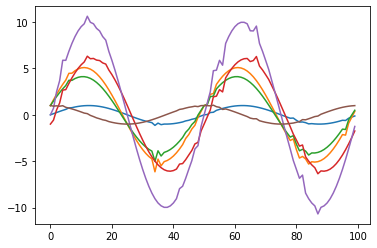

In [9]:
series = new_series_special
sns.lineplot(x=np.arange(0,T),y=series[0])
sns.lineplot(x=np.arange(0,T),y=series[1])
sns.lineplot(x=np.arange(0,T),y=series[2])
sns.lineplot(x=np.arange(0,T),y=series[3])
sns.lineplot(x=np.arange(0,T),y=series[4])
sns.lineplot(x=np.arange(0,T),y=series[5])
# sns.lineplot(x=np.arange(0,T),y=series[6])
# sns.lineplot(x=np.arange(0,T),y=series[7])
# sns.lineplot(x=np.arange(0,T),y=series[8])

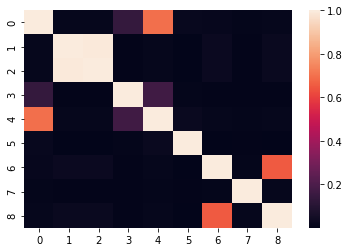

In [12]:
model = 'our'
exp_name = 'special'
sigma = np.load('dataset/best_sigma_%s_%s.npy'%(model,exp_name))
if (model == 'copula'):
    sns.heatmap(sigma.mean(axis=0))
else :
    sns.heatmap(sigma)
# new_series = np.array([[1,0],[5,1],[4,1],[6,-1],[10,0],[0,1],[1,5],[1,-6],[1,8]])

<AxesSubplot:>

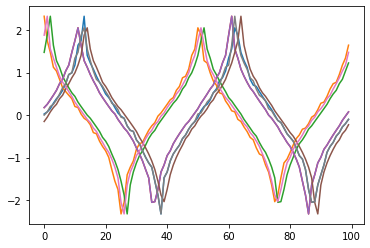

In [138]:
data_to_save = gauss
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,0])
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,1])
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,2])
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,3])
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,4])
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,5])
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,6])
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,7])
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,8])

<AxesSubplot:>

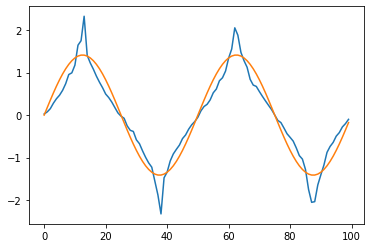

In [152]:
data_to_save = gauss
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,0])
data_to_save = normalised
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,0])
# sns.lineplot(x=np.arange(0,T),y=data_to_save[:,1])
# sns.lineplot(x=np.arange(0,T),y=data_to_save[:,2])
# sns.lineplot(x=np.arange(0,T),y=data_to_save[:,3])
# sns.lineplot(x=np.arange(0,T),y=data_to_save[:,4])
# sns.lineplot(x=np.arange(0,T),y=data_to_save[:,5])
# sns.lineplot(x=np.arange(0,T),y=data_to_save[:,8])
# sns.lineplot(x=np.arange(0,T),y=data_to_save[:,7])

In [150]:
temp = data_to_save-data_to_save.mean(axis=0)
temp.mean(axis=0)

array([[ 3.68038933e-16, -4.86277685e-16,  4.44089210e-17],
       [ 3.15303339e-16, -2.37587727e-16,  2.88657986e-17],
       [-1.24344979e-16, -3.01980663e-16, -6.92779167e-16]])

<AxesSubplot:>

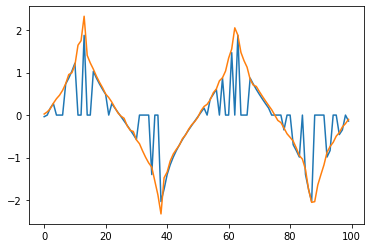

In [122]:
train_gauss = np.load('train_gauss.npy')
sns.lineplot(x=np.arange(0,T),y=train_gauss[:,0,0])
data_to_save = gauss
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,0])

In [57]:
sigma = np.load('dataset/best_sigma_copula.npy')
predictions = np.load('dataset/best_predictions_copula.npy')
sns.heatmap(sigma)
#sns.lineplot(x=np.arange(0,T),y=predictions[:,1])
#sns.lineplot(x=np.arange(0,T),y=new_series.T[:,1])

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/best_sigma_copula.npy'

<AxesSubplot:>

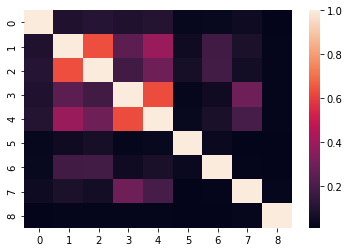

In [216]:
sigma = np.load('dataset/best_sigma_our.npy')
predictions = np.load('dataset/best_predictions_our.npy')
sns.heatmap(sigma)

<AxesSubplot:>

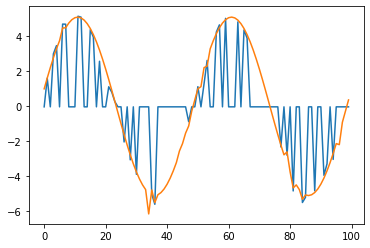

In [13]:
T = 100
exp_name = 'special'
model='our'
sigma = np.load('dataset/best_sigma_%s_%s.npy'%(model,exp_name))
predictions = np.load('dataset/best_predictions_%s_%s.npy'%(model,exp_name))
#sns.heatmap(sigma.mean(axis=0))
sns.lineplot(x=np.arange(0,T),y=predictions[:,1])
sns.lineplot(x=np.arange(0,T),y=new_series_special.T[:,1])

In [40]:
import numpy as np
points = np.concatenate([np.minimum(np.random.normal(0,1,(50,1)),1)+10,np.maximum(np.random.normal(0,1,(50,1)),-1)+50],axis=0)[:,0]


<AxesSubplot:>

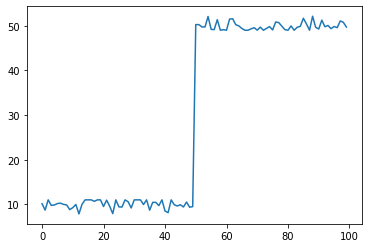

In [41]:
sns.lineplot(x=np.arange(0,100),y=points)

In [42]:
from scipy.stats import norm

temp = np.argsort(points,axis=0)[:,None]
ranks = np.empty_like(temp)
np.put_along_axis(ranks, temp, np.repeat(np.arange(temp.shape[0])[:,None],temp.shape[1],axis=1), axis=0)
ranks = ranks
gauss = norm.ppf(ranks/points.shape[0])
m=100
gauss[gauss == float('-inf')] = norm.ppf(1/((m**0.25)*4*np.sqrt(3.14*np.log(m))))
gauss[gauss == float('inf')] = norm.ppf(1-(1/((m**0.25)*4*np.sqrt(3.14*np.log(m)))))


<AxesSubplot:>

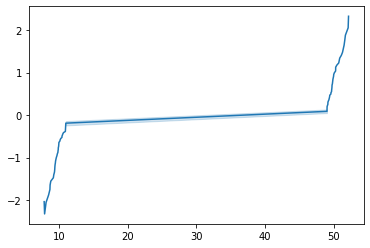

In [43]:
sns.lineplot(x=points,y=gauss[:,0])